# Training a classifier with gaze features for calculating predictions of various activities

__UbiComp Assignment 02, Task 01:__
This third notebook trains a classifier with select features and corresponding labels.\
The features and labels are read from a given csv-file.

## Read data from a csv-file.

Note that the csv-file we are using here is generated by the FeatureCalculation Notebook.

In [1]:
import os
import pandas as pd

recording_location = './'

all_features_csv = os.path.join(recording_location, './Data/FeatureFiles/feature_list_all.csv')
df = pd.read_csv(all_features_csv)

In [2]:
# Uncomment the following lines to see all columns of the csv file (i.e., the features and labels)
print("Columns of the CSV file are 19 features, label of the activity, duration or the timespan of the activity, and the ID of the participant:")
list(df.columns)

Columns of the CSV file are 19 features, label of the activity, duration or the timespan of the activity, and the ID of the participant:


['meanFix',
 'minFix',
 'maxFix',
 'varFix',
 'stdFix',
 'meanDis',
 'minDis',
 'maxDis',
 'varDis',
 'stdDisp',
 'freqDisPerSec',
 'number_of_blinks',
 'blinkMean',
 'blinkMin',
 'blinkMax',
 'blinkRate',
 'xDir',
 'yDir',
 'fixDensPerBB',
 'label',
 'duration',
 'participant_id']

In [3]:
from IPython.display import display

read_df = df[df.label == 'Reading']
inspect_df = df[df.label == 'Inspection']
search_df = df[df.label == 'Search']

#print("Sample reading data:")
#display(read_df[['meanFix', 'maxFix', 'varFix', 'xDir', 'yDir']].head(10))

#print("Sample inspection data:")
#display(inspect_df[['meanFix', 'maxFix', 'varFix', 'xDir', 'yDir']].head(10))

#print("Sample search data:")
#display(search_df[['meanFix', 'maxFix', 'varFix', 'xDir', 'yDir']].head(10))

## For the classification we used a modified version of [an SVM cassifier.](https://towardsdatascience.com/multiclass-classification-with-support-vector-machines-svm-kernel-trick-kernel-functions-f9d5377d6f02)
First, we need to include some libraries 

In [4]:
#
#Importing the necessary packages and libaries
#
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt
import numpy as np

## Let's store the labels and six selected features (among nineteen as denoted in the csv file)

In [5]:
features = df[["meanFix", "maxFix", "varFix", "xDir", "yDir", "fixDensPerBB", "blinkMean", "blinkRate", "stdDisp", "varDis"]]
labels = df ['label']

## This is how the features and labels look

In [6]:
print("Features:")
display(features.head(10))
print("Labels:")
display(labels.head(10))

Features:


,meanFix,maxFix,varFix,xDir,yDir,fixDensPerBB,blinkMean,blinkRate,stdDisp,varDis
0,250.882353,666,16554.228164,0.484848,0.606061,369.479986,2291.500000,0.4,0.032029,0.001026
1,246.742857,900,23549.020168,0.529412,0.529412,363.711018,0.000000,0.0,0.030780,0.000947
2,237.257143,1067,36627.431933,0.441176,0.558824,266.246748,0.000000,0.0,0.045998,0.002116
3,293.137931,767,35208.551724,0.500000,0.500000,319.553727,0.000000,0.0,0.028777,0.000828
4,199.125000,566,12614.163462,0.589744,0.487179,305.832090,1899.800000,0.5,0.030645,0.000939
5,262.562500,867,36411.415323,0.516129,0.580645,236.757891,0.000000,0.0,0.023737,0.000563
6,204.175000,733,16987.430128,0.538462,0.512821,445.453567,0.000000,0.0,0.036133,0.001306
7,221.540541,733,19568.977477,0.583333,0.500000,538.273012,6266.000000,0.1,0.028712,0.000824
8,430.095238,2567,322794.690476,0.800000,0.450000,77.460002,3266.666667,0.3,0.038339,0.001470
9,227.805556,533,8651.246825,0.914286,0.457143,132.320562,1162.625000,0.8,0.046638,0.002175


Labels:


0    Inspection
1    Inspection
2    Inspection
3    Inspection
4    Inspection
5    Inspection
6    Inspection
7    Inspection
8       Reading
9       Reading
Name: label, dtype: object

## Let's normalize the features (i.e., each column indivudally)

In [7]:
scaler = MaxAbsScaler()
scaler.fit(features)
scaled = scaler.transform(features)
scaled_features = pd.DataFrame(scaled, columns=features.columns)
print("Normalized Features:")
display(scaled_features.head(10))

Normalized Features:


,meanFix,maxFix,varFix,xDir,yDir,fixDensPerBB,blinkMean,blinkRate,stdDisp,varDis
0,0.412048,0.144783,0.013814,0.527009,0.743802,0.238355,0.365704,0.068966,0.182850,0.033434
1,0.405249,0.195652,0.019651,0.575448,0.649733,0.234633,0.000000,0.000000,0.175716,0.030876
2,0.389670,0.231957,0.030564,0.479540,0.685829,0.171758,0.000000,0.000000,0.262595,0.068956
3,0.481448,0.166739,0.029380,0.543478,0.613636,0.206147,0.000000,0.000000,0.164283,0.026989
4,0.327042,0.123043,0.010526,0.641026,0.597902,0.197295,0.303192,0.086207,0.174947,0.030606
5,0.431232,0.188478,0.030384,0.561010,0.712610,0.152735,0.000000,0.000000,0.135511,0.018363
6,0.335336,0.159348,0.014175,0.585284,0.629371,0.287366,0.000000,0.000000,0.206277,0.042550
7,0.363857,0.159348,0.016330,0.634058,0.613636,0.347245,1.000000,0.017241,0.163908,0.026866
8,0.706387,0.558043,0.269361,0.869565,0.552273,0.049970,0.521332,0.051724,0.218869,0.047904
9,0.374147,0.115870,0.007219,0.993789,0.561039,0.085361,0.185545,0.137931,0.266247,0.070887


## Let's split the data and have two sets, one for training the model and one for testing it.

In [8]:
# feature_train, feature_test, label_train, label_test = train_test_split(features, labels, train_size=0.8, random_state = 0, stratify=labels)

# Uncomment the following line if you want to work with normalized features. You will note how the accuracy and confusion matrix changes
feature_train, feature_test, label_train, label_test = train_test_split(scaled_features, labels, train_size=0.8, random_state = 0, stratify=labels)

## We can work with different SVM-kernels:

In [9]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo', probability=True).fit(feature_train, label_train)

rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo', probability=True).fit(feature_train, label_train)

poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo', probability=True).fit(feature_train, label_train)

sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo', probability=True).fit(feature_train, label_train)

## Lets collect the predictions from test data. . .

In [10]:
linear_pred = linear.predict(feature_test)
poly_pred = poly.predict(feature_test)
rbf_pred = rbf.predict(feature_test)
sig_pred = sig.predict(feature_test)

## . . . and have a look at the accuracy of each one:

In [11]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(feature_test, label_test)
accuracy_poly = poly.score(feature_test, label_test)
accuracy_rbf = rbf.score(feature_test, label_test)
accuracy_sig = sig.score(feature_test, label_test)

print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)
print("Accuracy Sigmoid Kernel:", accuracy_sig)
      

Accuracy Linear Kernel: 0.8666666666666667
Accuracy Polynomial Kernel: 0.9333333333333333
Accuracy Radial Basis Kernel: 0.8333333333333334
Accuracy Sigmoid Kernel: 0.3


## This is how the confusion matrix of each predictor looks like

In [12]:
# creating a confusion matrix
cm_lin = confusion_matrix(label_test, linear_pred)
cm_poly = confusion_matrix(label_test, poly_pred)
cm_rbf = confusion_matrix(label_test, rbf_pred)
cm_sig = confusion_matrix(label_test, sig_pred)

print("CM Linear:")
print(cm_lin)
print("CM Polynomial:")
print(cm_poly)
print("CM Radial:")
print(cm_rbf)
print("CM Sigmoid:")
print(cm_sig)

CM Linear:
[[ 9  0  1]
 [ 0 10  0]
 [ 3  0  7]]
CM Polynomial:
[[10  0  0]
 [ 1  9  0]
 [ 1  0  9]]
CM Radial:
[[8 0 2]
 [1 9 0]
 [2 0 8]]
CM Sigmoid:
[[2 8 0]
 [2 5 3]
 [0 8 2]]


## A more colorful confusion matrix for the linear predictor

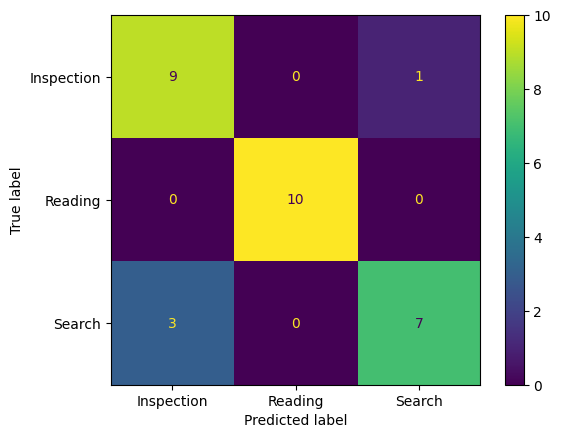

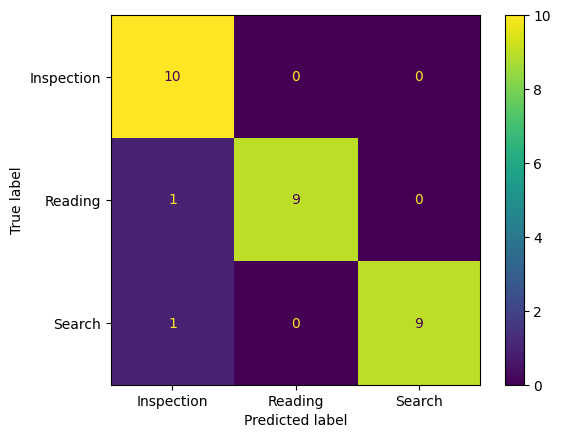

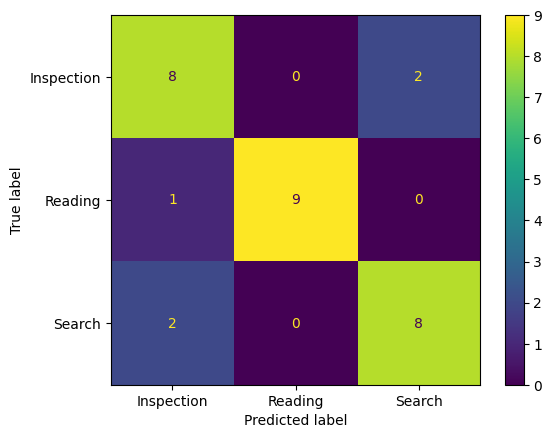

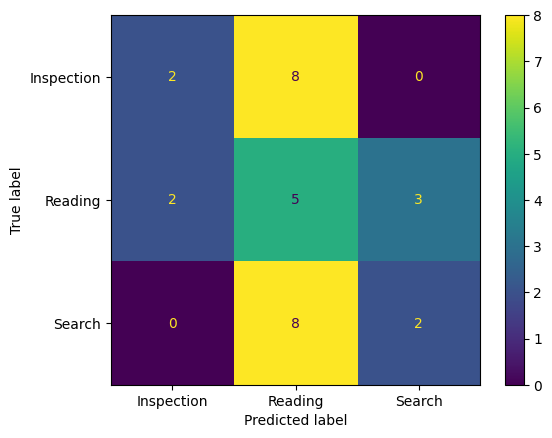

In [13]:
ConfusionMatrixDisplay.from_estimator(linear, feature_test, label_test)
ConfusionMatrixDisplay.from_estimator(poly, feature_test, label_test)
ConfusionMatrixDisplay.from_estimator(rbf, feature_test, label_test)
ConfusionMatrixDisplay.from_estimator(sig, feature_test, label_test)

## Finally, let's make a cross check

In [14]:
feature_test.head()

,meanFix,maxFix,varFix,xDir,yDir,fixDensPerBB,blinkMean,blinkRate,stdDisp,varDis
97,0.806849,0.384130,0.166533,0.664251,0.818182,0.403406,0.000000,0.000000,0.113179,0.012810
13,0.403466,0.115870,0.009165,0.927110,0.649733,0.084141,0.000000,0.000000,0.192006,0.036866
130,0.488754,0.202826,0.041559,0.465839,0.701299,0.249208,0.188477,0.120690,0.165433,0.027368
109,0.353648,0.166739,0.016682,0.573671,0.681818,0.337267,0.065331,0.189655,0.310316,0.096296
112,0.553740,0.290000,0.064790,0.478261,0.638182,0.834522,0.107245,0.448276,0.165767,0.027479


In [15]:
linear.predict(np.array(features.iloc[59]).reshape(1,-1))

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['Inspection'], dtype=object)

## Let's detect the label (i.e., the activity) of some new features (i.e., that are extracted from a new stream of eye tracking data):

In [16]:
print("New Feature:")
# NOTE that we use a particular feature from the test dataset but this can be replaced with new data e.g., that arrives online and was not included in training or testing the classifier
new_feature = feature_test.tail(2)
display(new_feature)

new_linear_pred = linear.predict_proba(new_feature)
new_linear_pred_2 = linear.predict(new_feature)
print("New Linear Prediction:")
display(new_linear_pred)
display(new_linear_pred_2)

new_poly_pred_2 = poly.predict(new_feature)
new_poly_pred = poly.predict_proba(new_feature)
print("New Poly Prediction:")
display(new_poly_pred)
display(new_poly_pred_2)

new_rbf_pred_2 = rbf.predict(new_feature)
new_rbf_pred = rbf.predict_proba(new_feature)
print("New RBF Prediction:")
display(new_rbf_pred)
display(new_rbf_pred_2)

new_sig_pred_2 = sig.predict(new_feature)
new_sig_pred = sig.predict_proba(new_feature)
print("New Sig Prediction:")
display(new_sig_pred)
display(new_sig_pred_2)

New Feature:


,meanFix,maxFix,varFix,xDir,yDir,fixDensPerBB,blinkMean,blinkRate,stdDisp,varDis
0,0.412048,0.144783,0.013814,0.527009,0.743802,0.238355,0.365704,0.068966,0.18285,0.033434
23,0.502233,0.246304,0.053017,0.582298,0.613636,0.202995,0.000000,0.000000,0.23776,0.056530


New Linear Prediction:


array([[0.85379029, 0.0090059 , 0.13720381],
       [0.86278421, 0.04166875, 0.09554704]])

array(['Inspection', 'Inspection'], dtype=object)

New Poly Prediction:


array([[0.77423052, 0.01041614, 0.21535334],
       [0.75784742, 0.07381548, 0.1683371 ]])

array(['Inspection', 'Inspection'], dtype=object)

New RBF Prediction:


array([[0.88621539, 0.00714854, 0.10663607],
       [0.88951193, 0.03383511, 0.07665296]])

array(['Inspection', 'Inspection'], dtype=object)

New Sig Prediction:


array([[0.49372009, 0.34441722, 0.16186269],
       [0.54291013, 0.3209234 , 0.13616647]])

array(['Reading', 'Reading'], dtype=object)

In [17]:
# linear.predict(feature_test)
import joblib

joblib.dump(linear, "./random_forest.joblib")

['./random_forest.joblib']